In [257]:
import numpy as np
import matplotlib.pyplot as plt

import sympy as sym # required to compute partial derivatives

import matplotlib.pyplot as plt
import matplotlib_inline
from IPython import display 
%matplotlib inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

***
# Coding Challenge: fixed vs dynamic learning rate
- The value of the learning rate will be different at each iteration / epoch in the gradient descent algorithm.
- This will be with the 1D Gradient Descent code completed in an earlier lesson.


In [258]:
# functions

# defining range of x, evenly spaced points, with 2001 steps
x = np.linspace(-2,2,2001) 

# defining function
def func(x):
    return (3*x**2) - (3*x) + 4 # f(x) = 3x^2 - 3x + 4

# derivative of function
def der(x):
    return (6*x) -3 # dy/dx = 6x - 3

***
## Gradient Descent Algorithm in 1D, adaptive learning rate


In [259]:
# values for fixed and dynamic experiments

# starting guess
local_min = np.random.choice(x,1)
initial_guess = local_min # stores initial value of min

# parameters
learning_rate = 0.01
training_epochs = 100

### Dynamically adjusting learning rate with derivative
- learning rate changes with each iteration by being directly multiplied by the gradient value.
- This works because the gradient will approach 0 when the algorithm is converging to the correct local min value. 
- This compensates for a poor starting guess of the local minimum, because the steps will be very large. With a fixed learning rate this would waste resources because it would take longer to solve.
- Looking at the graph, this exponentially decreases the learning rate.

In [260]:
local_min = initial_guess# resetting value for local min
print("First guess for local min:", initial_guess)

# training and storing results
model_params_grad = np.zeros((training_epochs,3)) # vector to store results

for epoch_idx in range(training_epochs):
    
    gradient = der(local_min) # computing grad descent

    lr_value = learning_rate * np.abs(gradient) # learning rate is scaled by the gradient
    
    #updating local min
    local_min = local_min - (gradient*lr_value) 
        
    # storing parameters
    model_params_grad [epoch_idx,0] = local_min
    model_params_grad [epoch_idx,1] = gradient
    model_params_grad [epoch_idx,2] = lr_value
print("Final guess for local min:",local_min)

First guess for local min: [-1.136]
Final guess for local min: [0.47392348]


### Dynamically adjusting learning rate with time
- learning rate is scaled by the time. As each iteration passes, it is multiplied by a value that is continually approaching 0. 
- This is because the numerator of the fraction grows larger, so the fraction grows larger. When 1 subtracts this value, it grows smaller with every iteration.
- This method is interesting because it is not dependent on the initial starting value of the local minimum for efficiency.
- Looking at the graph, in most cases the learning rate value will follow a linear decrease with each iteration.

In [261]:
local_min = initial_guess# resetting value for local min
print("First guess for local min:", initial_guess)

# training and storing results
model_params_time = np.zeros((training_epochs,3)) # vector to store results

for epoch_idx in range(training_epochs):
    
    gradient = der(local_min) # computing grad descent

    lr_value = learning_rate * (1 - (epoch_idx+1)/training_epochs) # learning rate is scaled by the time
    
    #updating local min
    local_min = local_min - (gradient*lr_value) 
    
    # storing parameters
    model_params_time [epoch_idx,0] = local_min
    model_params_time [epoch_idx,1] = gradient
    model_params_time [epoch_idx,2] = lr_value
print("Final guess for local min:",local_min)

First guess for local min: [-1.136]
Final guess for local min: [0.42102933]


#### Normal Fixed learning Rate for comparison
- This is great to compare the above results with. Need to make sure that complicating things is actually improving the performance.
- Surprisingly enough, some of the best final estimates of the local min still come from this version of the algorithm.
- The other algorithms can vary from 0.01 to 0.1 from the actual local min value.

In [262]:
local_min = initial_guess # resetting value for local min
print("First guess for local min:", initial_guess)

# training and storing results
model_params_fixed = np.zeros((training_epochs,3)) # vector to store results

for epoch_idx in range(training_epochs):
    
    gradient = der(local_min) # computing grad descent
   
    #updating local min
    local_min = local_min - (gradient*learning_rate) 
        
    # storing parameters
    model_params_fixed [epoch_idx,0] = local_min
    model_params_fixed [epoch_idx,1] = gradient
    model_params_fixed [epoch_idx,2] = learning_rate
print("Final guess for local min:",local_min)

First guess for local min: [-1.136]
Final guess for local min: [0.49663822]


## Plotting Results

<function matplotlib.pyplot.show(close=None, block=None)>

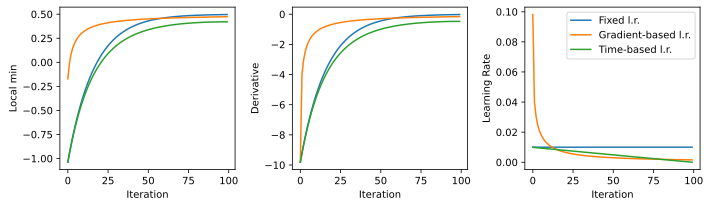

In [263]:
# comparing results of dynamic and static learning rate

fig,ax = plt.subplots(1,3, figsize=(10,3))

# generating plots for both experiments
for i in range(3):
    ax[i].plot(model_params_fixed[:,i], markerfacecolor='w') # fixed learning rate data
    ax[i].plot(model_params_grad[:,i], markerfacecolor='w') # gradient-based learning rate data
    ax[i].plot(model_params_time[:,i], markerfacecolor='w') # time-based learning rate data
    ax[i].set_xlabel('Iteration')

ax[0].set_ylabel('Local min')
ax[1].set_ylabel('Derivative')
ax[2].set_ylabel('Learning Rate')
ax[2].legend(['Fixed l.r.', 'Gradient-based l.r.', 'Time-based l.r.'])

plt.tight_layout()
plt.show

***
### My idea of varying learning rate

- Take a linspace of value from $1x10^{-4}$ to $1x10^{-1}$ and keep the local min guess and epoch numbers constant.
- This doesn't vary learning rate through experiment, I've realized what this accomplishes is testing a lot of different possible static learning rates and seeing how quickly each one converges in a given amount of epochs.

In [264]:
# starting point (constant)
local_min = 0

# parameters
learning_rate = np.linspace(0.0001,0.01,100)
training_epochs = 100 # (constant)

# training and storing results
model_params_fixed = np.zeros((100,100,2)) # vector to store results

for lr_idx, lr_value in enumerate(learning_rate):

    local_min = 0 # reset local min for each run
    
    for epoch_idx in range(training_epochs):
        # training
        gradient = der(local_min) # computing grad descent
        local_min = local_min - (gradient*lr_value) 
        
        # storing parameters local min and learning rate value
        model_params_fixed [lr_idx, epoch_idx,0] = local_min
        model_params_fixed [lr_idx, epoch_idx,1] = lr_value


### Plotting Results

<function matplotlib.pyplot.show(close=None, block=None)>

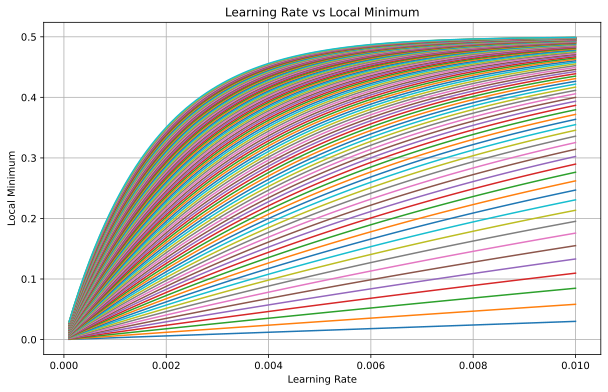

In [265]:
# plot
plt.figure(figsize=(10,6))

# ploting learning rate vs local min
plt.plot(model_params_fixed[:,:,1], model_params_fixed[:,:,0],linestyle='-')

# plot labels
plt.title('Learning Rate vs Local Minimum')
plt.xlabel('Learning Rate')
plt.ylabel('Local Minimum')
plt.grid(True)

plt.show
